### Run SAMAP

In [1]:
from samap.mapping import SAMAP
from samap.analysis import (get_mapping_scores, GenePairFinder,
                             sankey_plot, chord_plot, CellTypeTriangles,
                             ParalogSubstitutions, FunctionalEnrichment,
                             convert_eggnog_to_homologs, GeneTriangles)
from samalg import SAM
import pandas as pd

~/samap/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
sam1=SAM()
#fn1 = './Chick.h5ad'
fn1 = './Chick/merged.h5ad'
sam1.load_data(fn1)

~/samap/lib/python3.9/site-packages/anndata/compat/__init__.py:311: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(


In [7]:
sam2=SAM()
#fn2 = './Duck.h5ad'
fn2 = './Duck/merged.h5ad'
sam2.load_data(fn2)

~/samap/lib/python3.9/site-packages/anndata/compat/__init__.py:311: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(


In [9]:
filenames = {'Ch':fn1,'Du':fn2}
sm = SAMAP(
        filenames,
        f_maps = './peps/maps/',
        save_processed=True #if False, do not save the processed results to `*_pr.h5ad`
    )

Processing data Ch from:
./Chick/merged.h5ad


~/samap/lib/python3.9/site-packages/anndata/compat/__init__.py:311: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(


RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 1, Convergence: 0.8015158571450359
Iteration: 2, Convergence: 0.013169253254320704
Computing the UMAP embedding...


~/samap/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Elapsed time: 265.3239688873291 seconds
Not updating the manifold...
Processing data Du from:
./Duck/merged.h5ad


~/samap/lib/python3.9/site-packages/anndata/compat/__init__.py:311: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(


RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 1, Convergence: 0.795236511653925
Iteration: 2, Convergence: 0.01643523743769746
Computing the UMAP embedding...


~/samap/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Elapsed time: 419.82110714912415 seconds
Not updating the manifold...
12030 `Ch` gene symbols match between the datasets and the BLAST graph.
8479 `Du` gene symbols match between the datasets and the BLAST graph.


``` python
# done out of the jupyter 
sm.run(pairwise=True)
samap = sm.samap # SAM object with species stitched together
import pickle
with open('./SAMap.pkl', 'wb')  as f:
    pickle.dump(sm, f)
```


### After SAMAP

In [2]:
from samap.mapping import SAMAP
from samap.analysis import (get_mapping_scores, GenePairFinder,
                            sankey_plot, chord_plot, CellTypeTriangles, 
                            ParalogSubstitutions, FunctionalEnrichment,
                            convert_eggnog_to_homologs, GeneTriangles)
from samalg import SAM
import pandas as pd
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import scanpy.external as sce
from matplotlib import colormaps
import pickle

~/samap/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# 打开.pkl文件，'rb'表示以二进制读取模式打开
with open('./SAMap.pkl', 'rb') as f:
    # 使用pickle.load()函数反序列化文件中的数据
    sm_loaded = pickle.load(f)

In [4]:
samap = sm_loaded.samap
sm = sm_loaded

In [9]:
keys = {'Ch':'seurat_clusters','Du':'seurat_clusters'}
D,MappingTable = get_mapping_scores(sm,keys,n_top = 100)

In [ ]:
adata1=samap.adata.copy()
adata1
sc.pl.umap(adata1, color="species", title="Species", show=False)

In [28]:
adata1.obsm['X_pca'] = samap.adata.obsm['X_umap']  # 替换默认 PCA 空间

~/samap/lib/python3.9/site-packages/umap/spectral.py:485: RuntimeWarning: divide by zero encountered in divide
  1.0 / sqrt_deg, 0, graph.shape[0], graph.shape[0]
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
~/samap/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
~/samap/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


<Axes: title={'center': 'Species'}, xlabel='UMAP1', ylabel='UMAP2'>

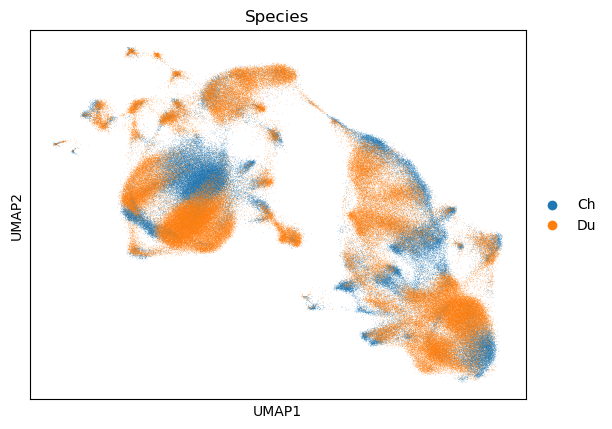

In [30]:
sc.tl.umap(adata1)
sc.pl.umap(adata1, color="species", title="Species", show=False)

In [33]:
sc.tl.leiden(adata1, key_added='leiden', resolution=1)

~/samap/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
~/samap/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
~/samap/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:379: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
~/samap/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
~/samap/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.

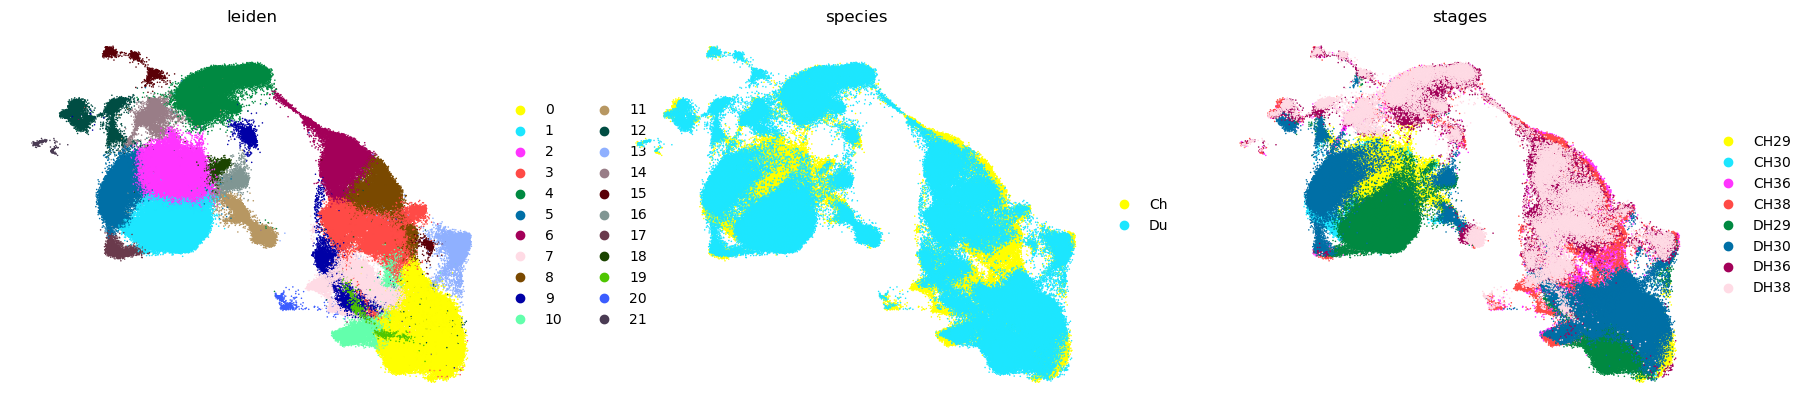

~/samap/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
~/samap/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
~/samap/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:379: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
~/samap/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
~/samap/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.

~/samap/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


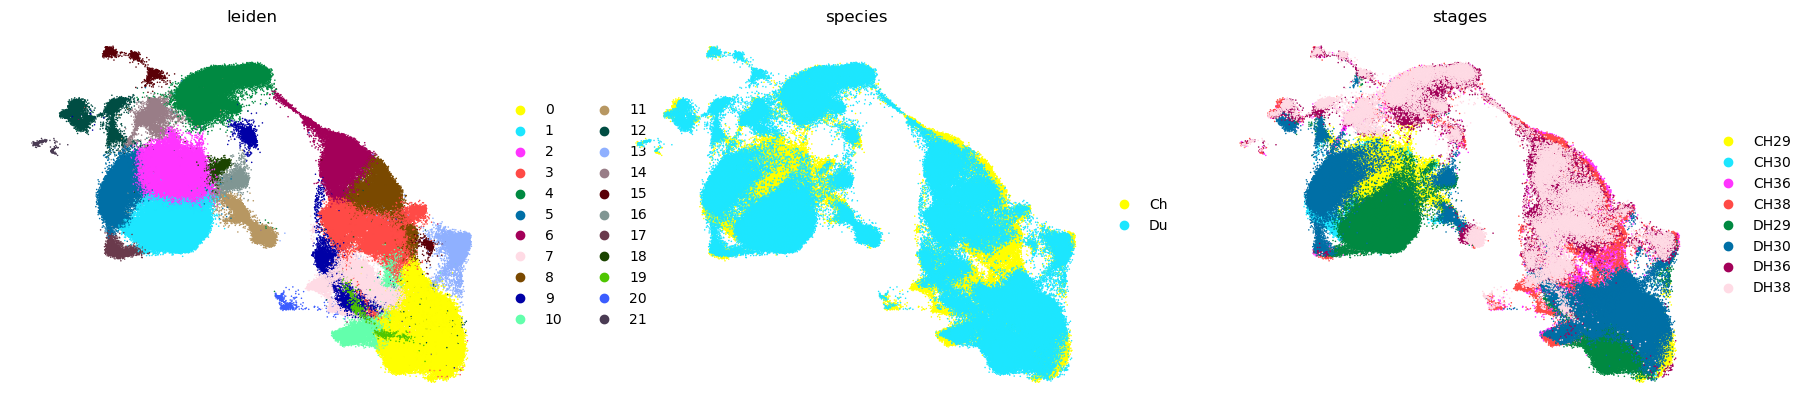

In [34]:
sc.pl.umap(adata1, color=['leiden',"species","stages"], title=['leiden',"species","stages"], palette=sc.pl.palettes.default_102, save="Samap_after_leiden_stages_species.pdf",
           show=True, alpha=1,size=5,add_outline=True,outline_color=["white","white"],frameon=False)
sc.pl.umap(adata1, color=['leiden',"species","stages"], title=['leiden',"species","stages"], palette=sc.pl.palettes.default_102, save="Samap_after_leiden_stages_species.png",
           show=True, alpha=1,size=5,add_outline=True,outline_color=["white","white"],frameon=False)

~/samap/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
~/samap/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
~/samap/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:379: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(


~/samap/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


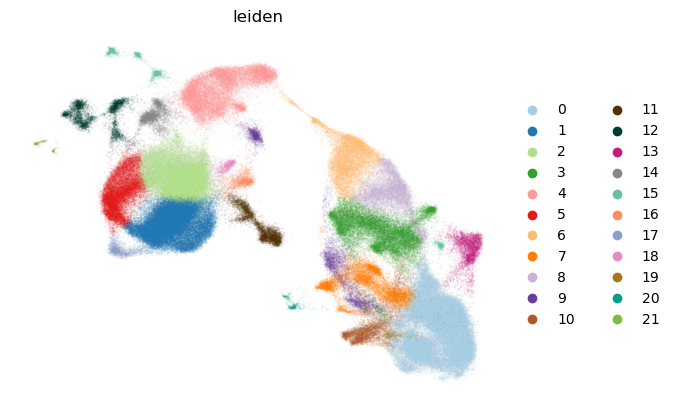

~/samap/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
~/samap/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
~/samap/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:379: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(


~/samap/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


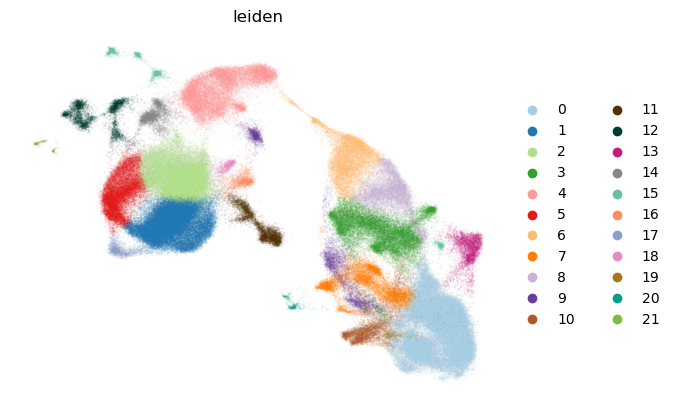

In [39]:
palette_cluster22 = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99',
                     '#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a',
                     '#b15928','#543005','#003c30','#c51b7d','#878787',
                     '#66c2a5','#fc8d62','#8da0cb','#e78ac3','#a6761d',
                     '#00a087','#7fbc41']

sc.pl.umap(adata1, color=['leiden'], title=['leiden'], palette=palette_cluster22, 
           show=True, alpha=0.1, size=5, add_outline=True,outline_color=["white","white"], frameon=False, save="Samap_harmony_leiden_integrate_cluster.pdf")

sc.pl.umap(adata1, color=['leiden'], title=['leiden'], palette=palette_cluster22, 
           show=True, alpha=0.1, size=5, add_outline=True,outline_color=["white","white"], frameon=False, save="Samap_harmony_leiden_integrate_cluster.png")

~/samap/lib/python3.9/site-packages/scanpy/plotting/_utils.py:430: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list


~/samap/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
~/samap/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
~/samap/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:379: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
~/samap/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


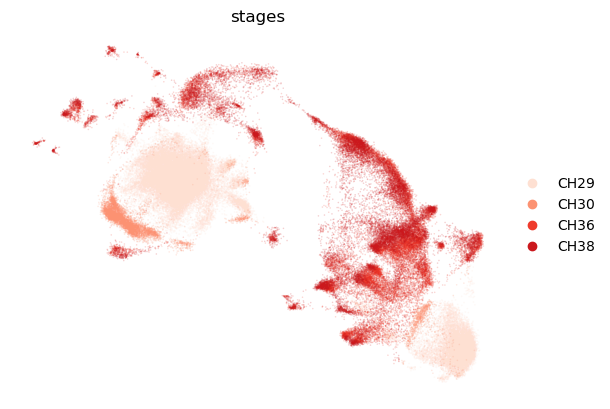

~/samap/lib/python3.9/site-packages/scanpy/plotting/_utils.py:430: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list


~/samap/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
~/samap/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
~/samap/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:379: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
~/samap/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


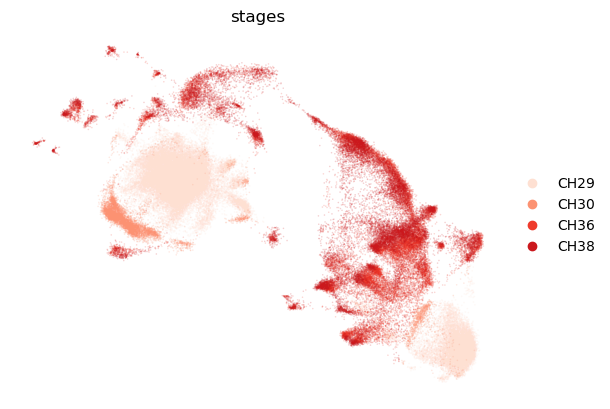

In [35]:
sc.pl.umap(adata1[adata1.obs['species'] == 'Ch'], color=['stages'], title=['stages'], palette=['#fee0d2','#fc9272','#ef3b2c','#cb181d'], 
           show=True, alpha=0.2, size=5, add_outline=True,outline_color=["white","white"], frameon=False, save="Samap_after_leiden_stages_Chick.pdf")

sc.pl.umap(adata1[adata1.obs['species'] == 'Ch'], color=['stages'], title=['stages'], palette=['#fee0d2','#fc9272','#ef3b2c','#cb181d'], 
           show=True, alpha=0.2, size=5, add_outline=True,outline_color=["white","white"], frameon=False, save="Samap_after_leiden_stages_Chick.png")

~/samap/lib/python3.9/site-packages/scanpy/plotting/_utils.py:430: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list


~/samap/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
~/samap/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
~/samap/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:379: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
~/samap/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


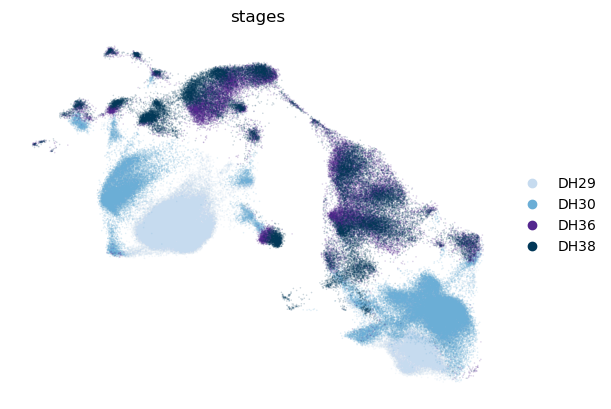

~/samap/lib/python3.9/site-packages/scanpy/plotting/_utils.py:430: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list


~/samap/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
~/samap/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
~/samap/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:379: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
~/samap/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


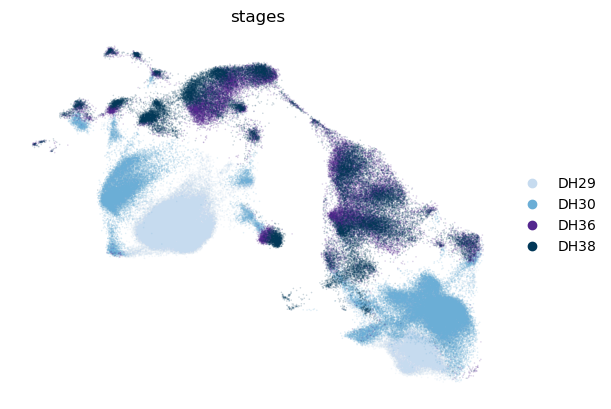

In [37]:
sc.pl.umap(adata1[adata1.obs['species'] == 'Du'], color=['stages'], title=['stages'], palette=['#c6dbef','#6baed6','#54278f','#023858'], 
           show=True, alpha=0.2, size=5, add_outline=True,outline_color=["white","white"], frameon=False, save="Samap_after_leiden_stages_Duck.pdf")

sc.pl.umap(adata1[adata1.obs['species'] == 'Du'], color=['stages'], title=['stages'], palette=['#c6dbef','#6baed6','#54278f','#023858'], 
           show=True, alpha=0.2, size=5, add_outline=True,outline_color=["white","white"], frameon=False, save="Samap_after_leiden_stages_Duck.png")

~/samap/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
~/samap/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
~/samap/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:379: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(


~/samap/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


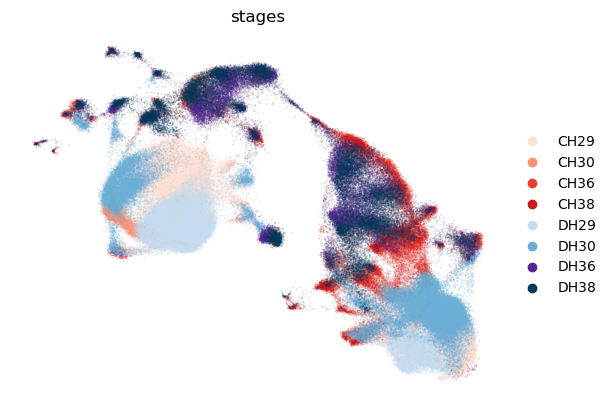

~/samap/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
~/samap/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
~/samap/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:379: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(


~/samap/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


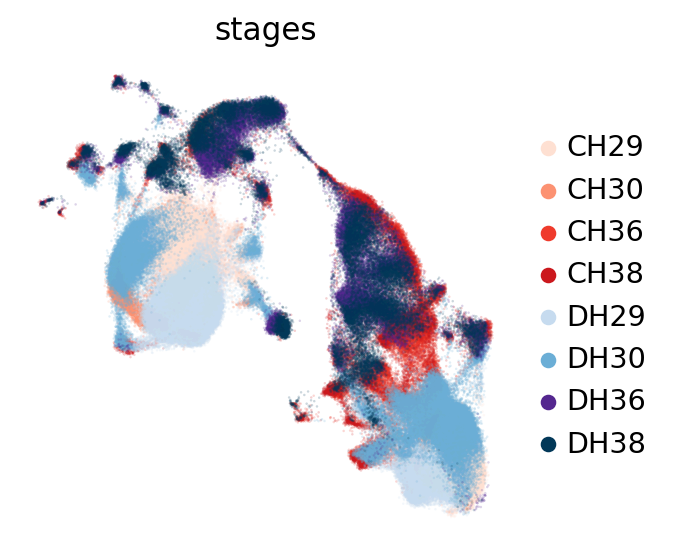

In [66]:
sc.pl.umap(adata1, color=['stages'], title=['stages'], palette=['#fee0d2','#fc9272','#ef3b2c','#cb181d',
                                                               '#c6dbef','#6baed6','#54278f','#023858'], 
           show=True, alpha=0.2, size=5, add_outline=True,outline_color=["white","white"], frameon=False, save="Samap_leiden_stages_species.pdf")
sc.settings.set_figure_params(dpi_save=600)
sc.pl.umap(adata1, color=['stages'], title=['stages'], palette=['#fee0d2','#fc9272','#ef3b2c','#cb181d',
                                                               '#c6dbef','#6baed6','#54278f','#023858'], 
           show=True, alpha=0.2, size=5, add_outline=True,outline_color=["white","white"], frameon=False, save="Samap_leiden_stages_species.png")

~/samap/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
~/samap/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
~/samap/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:379: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
~/samap/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


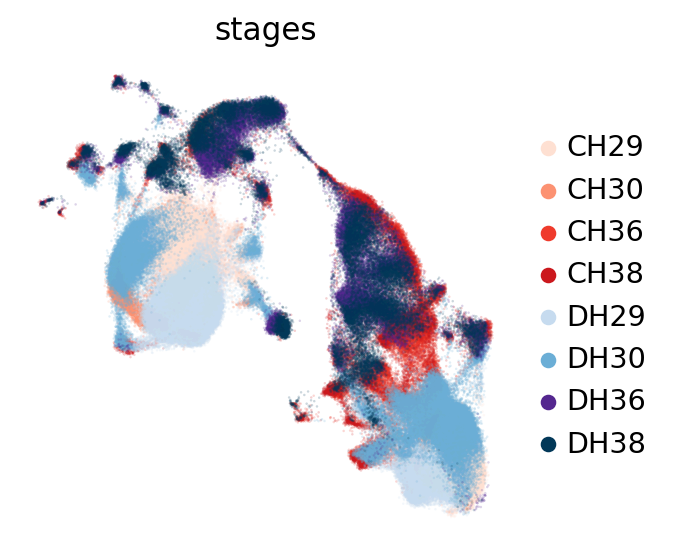

In [80]:
fig = sc.pl.umap(
    adata1, color=['stages'], title=['stages'], palette=['#fee0d2','#fc9272','#ef3b2c','#cb181d',
                                                               '#c6dbef','#6baed6','#54278f','#023858'], 
    alpha=0.2, size=5, add_outline=True,outline_color=["white","white"], frameon=False,
    return_fig=True,show=False,
)

fig.savefig(
    "Samap_leiden_stages_species-v2.png",
    dpi=600,
    bbox_inches="tight"
)

# 3) Save PDF
fig.savefig(
    "Samap_leiden_stages_species-v2.pdf",
    format="pdf",
    bbox_inches="tight"
)

# (Optionally) display it
plt.show()

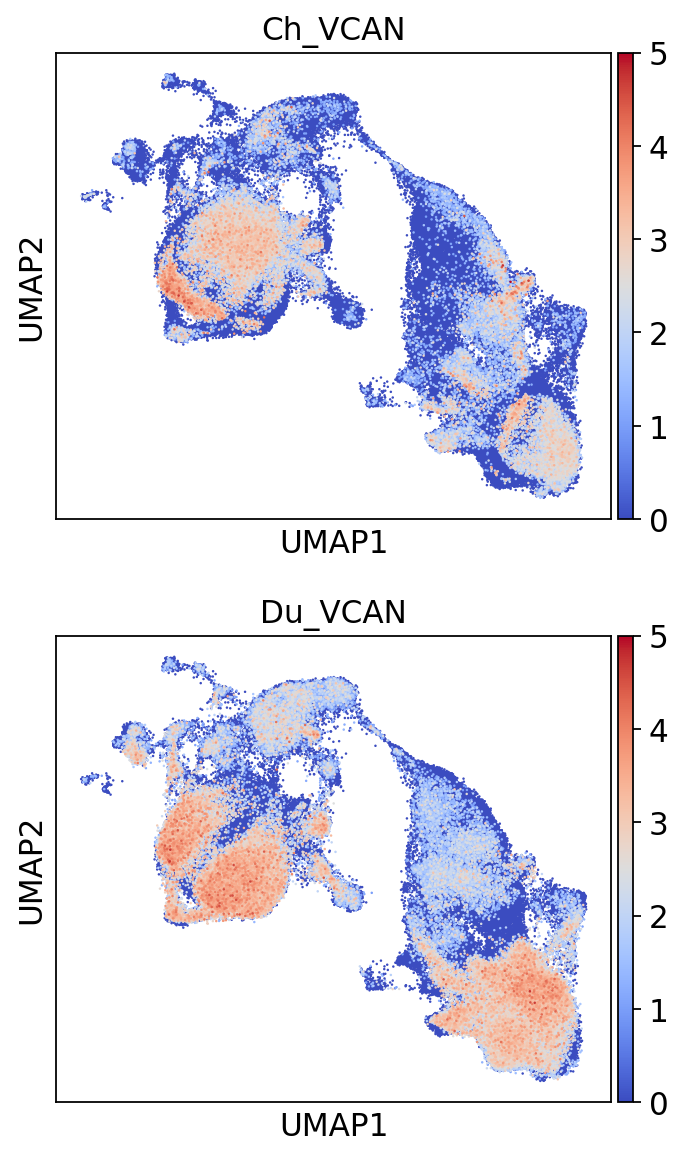

In [79]:
## VCAN
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
# 假设 adata 已有 UMAP 坐标（sc.tl.umap 已跑过）  
marker_genes = ['Ch_VCAN','Du_VCAN']

# 多面板画法，一次性把所有基因都画出
fig = sc.pl.umap(
    adata1,
    color=marker_genes,
    use_raw=False,      # 如果想用原始 log1p 数据
    cmap="coolwarm",
    vmin=0,                  # 确保从 0 开始
    vmax=5,
    size=5,
    ncols=1,
    show=False,
    return_fig=True     # <— this makes it return a matplotlib Figure
)

#fig.savefig("Duck-combined_umap_four_genes.png", dpi=300)
#fig.savefig("Duck-combined_umap_four_genes.pdf")

# 2) Save high‐res PNG
fig.savefig(
    "VCAN-combined_umap_four_genes.png",
    dpi=300,
    bbox_inches="tight"
)

# 3) Save PDF
fig.savefig(
    "VCAN-combined_umap_four_genes.pdf",
    format="pdf",
    bbox_inches="tight"
)

# (Optionally) display it
plt.show()

In [65]:
adata1.write("./SAMap_recluster_data.h5ad")